 <center>
<p><img src="files/figs/nbalogo.jpg"></p>
<h1 style="font-size:50px">CMSC320 Final Tutorial</h1>
<h4 style="font-size:20px">Mary Hood, Manpreet Sidhu, Alex Rothman</h4>
<hr>
</center>



In [51]:
# Import any necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime
pd.set_option('display.max_columns', 500)

# More will be added as we go

<p>
This is kind of a general outline for what we will need to do. We have plenty of flexibility with this project, so this not end up being exactly what we do.
    
Getting Started With The Data:
- Required Libraries
- Data source
- Reading the data
- Tidying Data / Data Modification    
    
Exploratory Data Analysis/Data Visualization:
- Graphing a bunch of different things and discussing those graphs
- Finding other important / interesting stats

Machine Learning stuff:
- Hypothesis/Hypotheses
- Linear Regression
- Regression w/ OLS
- Predictions
</p>


In [52]:
nba_stats = pd.read_csv("stats.csv")
nba_stats = nba_stats.drop(columns = ["Rk"])

for i, row in nba_stats.iterrows():
    player = row.Player
    name_split = player.split('\\')
    player_name = name_split[0]
    nba_stats.at[i, 'Player'] = player_name

nba_stats = nba_stats.sort_values(by="PTS", ascending = False)
nba_stats = nba_stats.reset_index()
nba_stats

,index,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,267,James Harden,PG,29,HOU,78,78,36.8,10.8,24.5,0.442,4.8,13.2,0.368,6.0,11.3,0.528,0.541,9.7,11.0,0.879,0.8,5.8,6.6,7.5,2.0,0.7,5.0,3.1,36.1
1,240,Paul George,SF,28,OKC,77,77,36.9,9.2,21.0,0.438,3.8,9.8,0.386,5.4,11.1,0.484,0.529,5.9,7.0,0.839,1.4,6.8,8.2,4.1,2.2,0.4,2.7,2.8,28.0
2,19,Giannis Antetokounmpo,PF,24,MIL,72,72,32.8,10.0,17.3,0.578,0.7,2.8,0.256,9.3,14.5,0.641,0.599,6.9,9.5,0.729,2.2,10.3,12.5,5.9,1.3,1.5,3.7,3.2,27.7
3,200,Joel Embiid,C,24,PHI,64,64,33.7,9.1,18.7,0.484,1.2,4.1,0.300,7.8,14.6,0.535,0.517,8.2,10.1,0.804,2.5,11.1,13.6,3.7,0.7,1.9,3.5,3.3,27.5
4,332,LeBron James,SF,34,LAL,55,55,35.2,10.1,19.9,0.510,2.0,5.9,0.339,8.1,14.0,0.582,0.560,5.1,7.6,0.665,1.0,7.4,8.5,8.3,1.3,0.6,3.6,1.7,27.4
5,159,Stephen Curry,PG,30,GSW,69,69,33.8,9.2,19.4,0.472,5.1,11.7,0.437,4.0,7.7,0.525,0.604,3.8,4.2,0.916,0.7,4.7,5.3,5.2,1.3,0.4,2.8,2.4,27.3
6,68,Devin Booker,SG,22,PHO,64,64,35.0,9.2,19.6,0.467,2.1,6.5,0.326,7.0,13.1,0.536,0.521,6.1,7.1,0.866,0.6,3.5,4.1,6.8,0.9,0.2,4.1,3.1,26.6
7,397,Kawhi Leonard,SF,27,TOR,60,60,34.0,9.3,18.8,0.496,1.9,5.0,0.371,7.5,13.8,0.542,0.546,6.1,7.1,0.854,1.3,6.0,7.3,3.3,1.8,0.4,2.0,1.5,26.6
8,191,Kevin Durant,SF,30,GSW,78,78,34.6,9.2,17.7,0.521,1.8,5.0,0.353,7.5,12.8,0.587,0.571,5.7,6.5,0.885,0.4,5.9,6.4,5.9,0.7,1.1,2.9,2.0,26.0
9,161,Anthony Davis,C,25,NOP,56,56,33.0,9.5,18.3,0.517,0.9,2.6,0.331,8.6,15.7,0.547,0.540,6.1,7.7,0.794,3.1,8.9,12.0,3.9,1.6,2.4,2.0,2.4,25.9


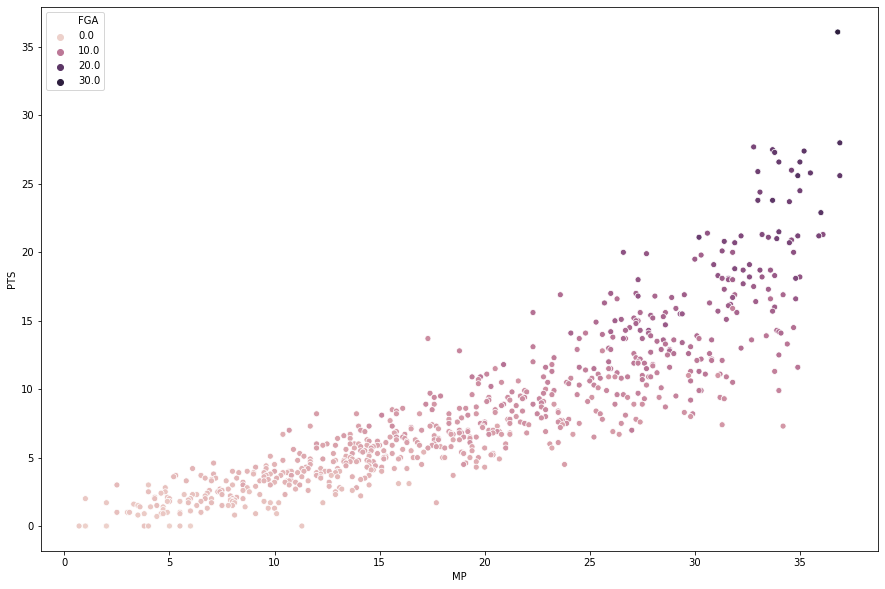

In [55]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x = 'MP', y = 'PTS', hue = 'FGA', data = nba_stats)
plt.show()
# Graphing Minutes Played against Points Per Game. The Hue of the 
# graph indicates the numner of Field Goals Attempted by each player 
# in the graph.

# WE CAN TRY TO FIT AN EQUATION TO THIS GRAPH AND PREDICT IT USING ML 

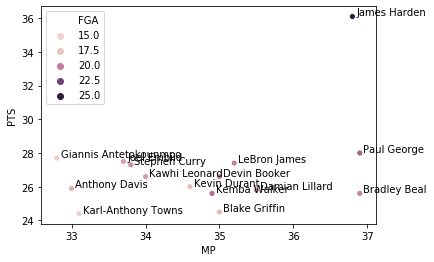

In [57]:
# Same graph with the top 15 scorers
top_15_scorers = nba_stats.head(15)
top_15_scorers 
sns.scatterplot(x = 'MP', y = 'PTS', hue = 'FGA', data = top_15_scorers)
for line in range(0,top_15_scorers.shape[0]):
     plt.text(top_15_scorers.MP[line]+0.05, top_15_scorers.PTS[line] + 0.05, 
     top_15_scorers.Player[line], horizontalalignment='left', 
     size='10', color='black')
plt.show()